## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [87]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [88]:
train, test = keras.datasets.cifar10.load_data()

In [89]:
## 資料前處理

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
def preproc_x(x):
    x = x.astype("float32")
    x = x.reshape(x.shape[0],-1)
    x = scaler.fit_transform(x)
    return x

def preproc_y(y):
    y = keras.utils.to_categorical(y, num_classes=10)
    return y

In [90]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [91]:
"""
建立你的神經網路
"""
from keras.models import Sequential
from keras.layers import Dense

def build_mlp(input_dim, layer_output_units, output_units):
    model = Sequential()
    for i, untis in enumerate(layer_output_units):  
        if i == 0:
            model.add(Dense(units=untis, 
                input_dim=input_dim,
                kernel_initializer='normal', 
                activation='relu'))
        else:
            model.add(Dense(units=untis,
                    kernel_initializer='normal', 
                    activation='relu'))
    model.add(Dense(units=output_units,
                kernel_initializer='normal', 
                activation='softmax'))
    return model    

In [92]:
"""
訓練模型
"""
def complie_train_model(model, optimizer,epochs, batch_size, x_train, y_train, x_test, y_test):
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    return model

In [93]:
"""
以視覺畫方式檢視訓練過程
"""
import pandas as pd
import seaborn as sns

def show_train_history(df, xlabel, ylabel): 
    styles = ['bs-','ro-','y^-']    
    g1 = df.plot.line()
    g1.set_xlabel(xlabel)
    g1.set_ylabel(ylabel)


In [94]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [95]:
results = list()
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    model = build_mlp(input_dim=x_train.shape[1], layer_output_units=[256,128], output_units=10)
    optimizer =  keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model = complie_train_model(model, optimizer,EPOCHS, BATCH_SIZE, x_train, y_train, x_test, y_test)
    results.append({"lr":lr, "model":model})

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.8658 - acc: 0.3369 - val_loss: 2.0781 - val_acc: 0.3188
Epoch 2/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.8923 - acc: 0.3142 - val_loss: 2.0115 - val_acc: 0.2832
Epoch 3/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.9105 - acc: 0.3036 - val_loss: 1.9520 - val_acc: 0.2944
Epoch 4/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8873 - acc: 0.3127 - val_loss: 1.9591 - val_acc: 0.3159
Epoch 5/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.8788 - acc: 0.3175 - val_loss: 1.9043 - val_acc: 0.3092
Epoch 6/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.8783 - acc: 0.3105 - val_loss: 2.0332 - val_acc: 0.3100
Epoch 7/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.8828 - acc: 0.3133 - val_loss: 1.

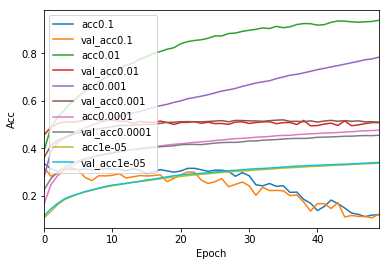

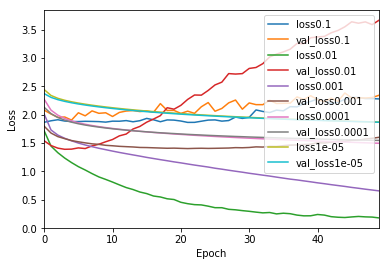

In [96]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
"""Code Here
將結果繪出
"""
for i, result in enumerate(results):
    history = result["model"].history.history
    lr = str(result["lr"])
    df1 = pd.DataFrame({"acc"+lr:history["acc"], "val_acc"+lr:history["val_acc"]})
    df2 = pd.DataFrame({"loss"+lr:history["loss"], "val_loss"+lr:history["val_loss"]})
    if i ==0:
        df1_results = df1.copy()
        df2_results = df2.copy()
    else:
        df1_results= pd.concat([df1_results, df1], axis=1)
        df2_results= pd.concat([df2_results, df2], axis=1)
     
show_train_history(df1_results, "Epoch", "Acc")
show_train_history(df2_results, "Epoch", "Loss")